In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from cosmosis.model import FFNet
from dataset import SKmake, QM7, QM7b, QM7X, QM9, ANI1x
from learning import Learn, Selector

from torch.optim import Adam
from torch.nn import MSELoss, L1Loss
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [ ]:
model_params = {'D_in': 128, 
                'H': 512, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'make': 'make_regression',
             'make_params': {'n_samples': 10000,
                             'n_features': 128}}

opt_params = {'lr': 0.01}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.15,.7)}
sched_params = {'factor': .5,
                'patience': 2}

l = Learn(SKmake, FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=MSELoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False,
          batch_size=256, epochs=10)

In [ ]:
model_params = {'D_in': 23*23+23*3+23*16, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'features': ['coulomb','xyz'],
             'targets': ['ae'],
             'embed': [('atoms',7,16,0,True)],
             'in_file': './data/qm7/qm7.mat'}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.15,.7)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}
opt_params = {'lr': 0.01}

l = Learn(QM7, FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=512, epochs=100)

In [ ]:
model_params = {'D_in': 23*23+13, 
                'H': 2048, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'features': ['coulomb','alpha_p','alpha_s','HOMO_g',
                          'HOMO_p','HOMO_z','LUMO_g','LUMO_p','LUMO_z',
                          'IP','EA','E1','Emax','Imax'],
            'targets': ['E'],
            'in_file': './data/qm7b/qm7b.mat'}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.15,.7)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 5}
opt_params = {'lr': 0.01}

l = Learn(QM7b, FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=512, epochs=100)

In [ ]:
ds_params = {'features': ['atXYZ'],
             'pad': False,
             'targets': ['eAT'],
             'embed': [('atNUM',9,64,0,True)],
             'selector': ['i1-c1-opt'],
             'use_h5': True}

model_params = {'D_in': 64*23+23+23+23, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel',
                'padding_idx': 0}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.1,.8)}
sched_params = {'factor': .1,
                'patience': 20,
                'cooldown': 10}
opt_params = {'lr': 0.01}

l = Learn(QM7X, FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=256, epochs=10)

#find the longest molecule
#qm7x = QM7X(**ds_params)
#l = 0
#for i in qm7x.ds_idx:
#    s = qm7x[i][0].shape.numel()
#    if s > l:
#        l = s
#print(l)

loading QM9 datadic from a pickled copy...
<class 'dataset.QM9'> dataset created...
epoch: 0 of 50, train loss: 221.8629040993124, val loss: 88.43722522097681, lr: 0.01
epoch: 5 of 50, train loss: 39.53645403812336, val loss: 31.026589345785144, lr: 0.01
epoch: 10 of 50, train loss: 21.969738450563828, val loss: 26.26692873254776, lr: 0.01
epoch: 15 of 50, train loss: 16.442633843406313, val loss: 18.373447863254547, lr: 0.005
epoch: 20 of 50, train loss: 14.423065563001904, val loss: 15.721683685661315, lr: 0.005
epoch: 25 of 50, train loss: 13.082875819741021, val loss: 10.629572191051484, lr: 0.0025
epoch: 30 of 50, train loss: 13.65262915256155, val loss: 11.214577182411194, lr: 0.0025
epoch: 35 of 50, train loss: 11.608892596816764, val loss: 12.464589120082856, lr: 0.00125
epoch: 40 of 50, train loss: 11.417415470507578, val loss: 13.360405750915529, lr: 0.00125
epoch: 45 of 50, train loss: 12.027986448118117, val loss: 10.493629647973062, lr: 0.00125
test loss: 10.77228049997806

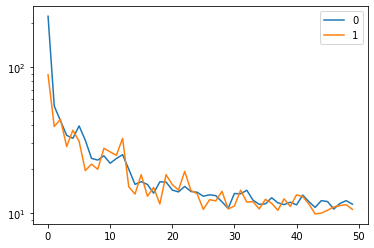

learning time: 0:00:42.889619


In [5]:
model_params = {'D_in': 12*12+12*12+12+12*12*16, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {'n': 133885, 
             'features': ['distance','coulomb','mulliken'],
             'embed': [('adjacency',4,16,0,True)], 
             'targets': ['U0'],
             'pad': 12, 
             'filter_on': ('n_atoms','<','13'),
             'use_pickle': 'n_atoms_12_or_less.p'}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.15,.7)}
sched_params = {'factor': .5,
                'patience': 5,
                'cooldown': 2}
opt_params = {'lr': 0.01}

l = Learn(QM9, FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=128, epochs=50)

creating QM9 dataset...
QM9 molecules scanned:  1
QM9 molecules created:  1
QM9 molecules scanned:  10001
QM9 molecules created:  10001
QM9 molecules scanned:  20001
QM9 molecules created:  20001
QM9 molecules scanned:  30001
QM9 molecules created:  30001
QM9 molecules scanned:  40001
QM9 molecules created:  40001
QM9 molecules scanned:  50001
QM9 molecules created:  50001
QM9 molecules scanned:  60001
QM9 molecules created:  60001
QM9 molecules scanned:  70001
QM9 molecules created:  70001
QM9 molecules scanned:  80001
QM9 molecules created:  80001
QM9 molecules scanned:  90001
QM9 molecules created:  90001
QM9 molecules scanned:  100001
QM9 molecules created:  100001
QM9 molecules scanned:  110001
QM9 molecules created:  110001
QM9 molecules scanned:  120001
QM9 molecules created:  120001
QM9 molecules scanned:  130001
QM9 molecules created:  130001
total QM9 molecules created: 130831
pickling a copy of the QM9 datadic...
<class 'dataset.QM9'> dataset created...
epoch: 0 of 20, train

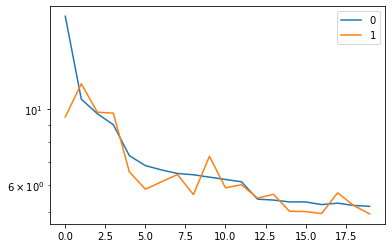

learning time: 0:56:20.054077


In [6]:
model_params = {'D_in': 29*29+29*29+29*29*8+29, 
                'H': 8192, 
                'D_out': 1, 
                'model_name': 'funnel'}

ds_params = {'n': 133885, 
             'features': ['distance','coulomb','mulliken'],
             'embed': [('adjacency',4,8,0,True)],
             'targets': ['U0'],
             'pad': 29, 
             'filter_on': False,
             'use_pickle': 'qm9.p'}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.15,.7)}
sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}
opt_params = {'lr': 0.01}

l = Learn(QM9, FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=32, epochs=20)

In [ ]:
model_params = {'D_in': 32*63+63+63+63, 
                'H': 8192, 
                'D_out': 1, 
                'model_name': 'funnel',
                'padding_idx': 0}

ds_params = {'features': ['coordinates'],
             'targets': ['wb97x_dz.energy'],
             'embed': [('atomic_numbers',6,32,0,True)],
             'pad': 63, #length of the longest molecule in the dataset
             'criterion': None,
             'conformation': 'random',
             'in_file': './data/ani1x/ani1x-release.h5'}

crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': 88,
                 'splits': (.1,.8)}
sched_params = {'factor': .1,
                'patience': 10,
                'cooldown': 10}
opt_params = {'lr': 0.01}

l = Learn(ANI1x, FFNet, Selector, Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=L1Loss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=False, 
          batch_size=128, epochs=10)

In [2]:
ds_params = {'n': 133885, 
             'features': ['mulliken','distance','coulomb'],
             'embed': [('adjacency',4,16,0,True)], 
             'targets': ['U0'],
             'pad': 12, 
             'filter_on': ('n_atoms','<','13'),
             'use_pickle': 'n_atoms_12_or_less.p'}


qm9 = QM9(**ds_params)

loading QM9 datadic from a pickled copy...


In [3]:
qm9[1]

(tensor([-0.5357,  0.1339,  0.1339,  0.1339,  0.1339,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0920,  1.0920,  1.0919,
          1.0919,  1.0920,  0.0000,  1.7831,  1.7831,  1.7832,  1.0920,  1.7831,
          0.0000,  1.7832,  1.7831,  1.0919,  1.7831,  1.7832,  0.0000,  1.7831,
          1.0919,  1.7832,  1.7831,  1.7831,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  

In [ ]:
ds_params = {'features': ['atXYZ'],
             'pad': False,
             'targets': ['eAT'],
             'embed': [('atNUM',9,64,0,True)],
             'selector': ['i1-c1-opt'],
             'use_h5': True}

qm7x = QM7X(**ds_params)

In [ ]:
qm7x[1]

In [ ]:
ds_params = {'features': ['coulomb','xyz'],
             'targets': ['ae'],
             'embed': [('atoms',7,16,0,True)],
             'in_file': './data/qm7/qm7.mat'}

qm7 = QM7(**ds_params)

In [ ]:
qm7[0]

In [ ]:
ds_params = {'features': ['coulomb','alpha_p','alpha_s','HOMO_g',
                          'HOMO_p','HOMO_z','LUMO_g','LUMO_p','LUMO_z',
                          'IP','EA','E1','Emax','Imax'],
            'targets': ['E'],
            'in_file': './data/qm7b/qm7b.mat'}

qm7b = QM7b(**ds_params)

In [ ]:
qm7b[0]

In [ ]:
ds_params = {'features': ['coordinates'],
             'targets': ['wb97x_dz.energy'],
             'embed': [('atomic_numbers',6,32,0,True)],
             'pad': 63, #length of the longest molecule in the dataset
             'criterion': None,
             'conformation': 'random',
             'in_file': './data/ani1x/ani1x-release.h5'}

ani1x = ANI1x(**ds_params)

In [ ]:
ani1x['C1H4']